### Data Cleaning and Transformation

In [5]:
# Load the necessary libraries needed for analysis
import streamlit as st
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [12]:
# load the dataset into a dataframe
def get_data():
    url = "./dataset/africa_food_prices.csv"
    data = pd.read_csv(url)
    return data

data = get_data()
data.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [13]:
# data structure
data.shape

(956779, 19)

In [14]:
# statistical details of the dataset
data.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price,mp_commoditysource
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05,0.0
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03,NaN
std,5.159597e+05,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05,NaN
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00,NaN
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01,NaN
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02,NaN
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02,NaN
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07,NaN


In [15]:
# data information and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [16]:
cols_to_drop = ['Unnamed: 0','mp_commoditysource']
data = data.drop(columns=cols_to_drop)

In [17]:
# check for duplicates in the dataset
data.duplicated().sum()

0

In [18]:
# check for null values
data.isnull().sum()

country_id          0
country             0
state_id            0
state          126678
market_id           0
market              0
produce_id          0
produce             0
currency_id         0
currency            0
pt_id               0
market_type         0
um_unit_id          0
quantity            0
month               0
year                0
price               0
dtype: int64

In [19]:
# remove columns that are not essential to this analysis
new_names = {    
    'pt_id':'market_type_id',
    'um_unit_id':'measurement_id',
    'market':'town',
    'market_id':'town_id',
    'price':'price_paid',
    'produce':'commodity_purchased',
    'produce_id':'commodity_purchased_id',
    'month':'month_recorded',
    'year':'year_recorded',
    }
data = data.rename(columns=new_names)

In [20]:
# data structure
data.shape

(956779, 17)

In [21]:
# preview the outcome
data.head(2)

,country_id,country,state_id,state,town_id,town,commodity_purchased_id,commodity_purchased,currency_id,currency,market_type_id,market_type,measurement_id,quantity,month_recorded,year_recorded,price_paid
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0


In [22]:
# remove null records
data.dropna(axis=0, how='any', inplace = True)
data.isnull().sum()

country_id                0
country                   0
state_id                  0
state                     0
town_id                   0
town                      0
commodity_purchased_id    0
commodity_purchased       0
currency_id               0
currency                  0
market_type_id            0
market_type               0
measurement_id            0
quantity                  0
month_recorded            0
year_recorded             0
price_paid                0
dtype: int64

# EXPLORATORY DATA ANALYSIS

## Aggregating data

In [23]:
#fetching the mean of the price paid yearly
table_agg = pd.pivot_table(data,index=["country","state","market_type","town","year_recorded"],values=["price_paid"],aggfunc='mean')
table_agg

price_paid
country  state    market_type town             year_recorded            
Algeria  Alger    Retail      Algiers          2015           144.455615
                                               2016           139.979592
         Tindouf  Retail      Auserd           2016           176.449275
                              Boujdour         2016           193.011364
                              Dakhla           2015           168.468137
...                                                                  ...
Zimbabwe Midlands Retail      Vhugwi           2019             2.086667
                                               2020           261.923171
                              Zvishavane Urban 2019             1.748000
                                               2020           206.956577
                                               2021           227.907827

[13052 rows x 1 columns]

In [24]:
#fetching result for the country Algeria
table_agg.query("country == ['Algeria']")

price_paid
country state   market_type town     year_recorded            
Algeria Alger   Retail      Algiers  2015           144.455615
                                     2016           139.979592
        Tindouf Retail      Auserd   2016           176.449275
                            Boujdour 2016           193.011364
                            Dakhla   2015           168.468137
                                     2016           175.055901
                            Layoun   2016           174.311594
                            Samara   2015           164.007353
                                     2016           172.701863
                            Tindouf  2015           158.208333
                                     2016           165.888199

In [25]:
#fetching result for the state Abia
table_agg.query("state == ['Abia']")

price_paid
country state market_type town year_recorded              
Nigeria Abia  Retail      Aba  2014             165.404167
                               2015             169.451081
                               2016             185.477389
                               2017             186.682692
                               2021             419.028779
              Wholesale   Aba  2014            4000.000000
                               2015            4000.000000
                               2016            7625.000000
                               2017           25206.043210
                               2021           40272.028846

In [26]:
#fetching result for the town Aba
table_agg.query("town == ['Aba']")

price_paid
country state market_type town year_recorded              
Nigeria Abia  Retail      Aba  2014             165.404167
                               2015             169.451081
                               2016             185.477389
                               2017             186.682692
                               2021             419.028779
              Wholesale   Aba  2014            4000.000000
                               2015            4000.000000
                               2016            7625.000000
                               2017           25206.043210
                               2021           40272.028846

In [27]:
data.country.value_counts()

Rwanda                      137746
Mali                         73843
Burundi                      60921
Gambia                       56971
Niger                        54974
Nigeria                      50285
Zambia                       42793
Benin                        39530
Senegal                      33563
Ghana                        25414
Ethiopia                     24627
Malawi                       22682
Cameroon                     22476
Guinea-Bissau                19796
Somalia                      18444
Central African Republic     12720
Liberia                      12302
Guinea                       11810
Sierra Leone                 11645
Zimbabwe                     10957
Mauritania                   10871
Sudan                         9890
Lesotho                       9364
Madagascar                    9193
Kenya                         8884
Uganda                        7781
Namibia                       7163
Djibouti                      6006
Togo                

## Top 10 countries with most sales

In [28]:
top_10_countries = data.country.value_counts().head(10)

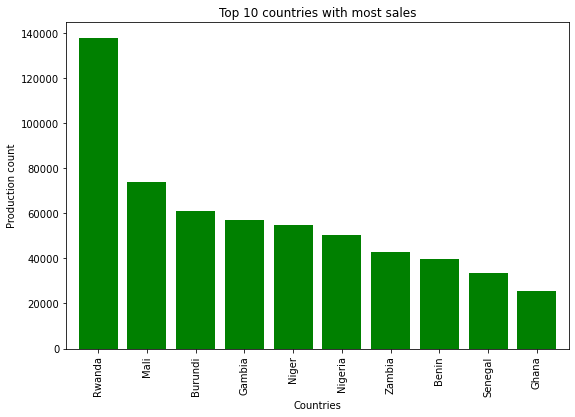

In [29]:
top_10_countries.plot(kind = 'bar', width =0.8, figsize=(9, 6), color='g')
plt.title('Top 10 countries with most sales')
plt.xlabel('Countries')
plt.ylabel('Production count')
plt.show()

From the graph above showing the top 10 countries, 'Rwanda' has the most sales of food followed by 'Mali'.

# Total number of sales per year

In [30]:
# number of sales per year
year_count = data.year_recorded.value_counts()
year_count.head(10)

2020    129745
2021     79145
2019     76602
2015     66779
2018     65169
2014     60673
2017     58949
2013     55980
2016     46628
2012     44642
Name: year_recorded, dtype: int64

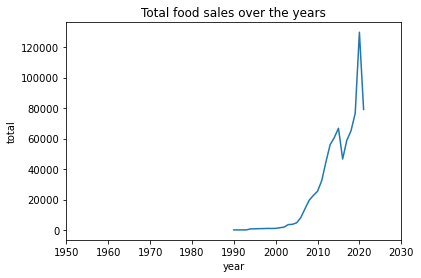

In [31]:
#line graph to visualize the result
sns.lineplot(data= year_count)
plt.title('Total food sales over the years')
plt.xlim(1950, 2030)
plt.xlabel('year')
plt.ylabel('total')
plt.show()

The line graph shows a huge increase in sales between 2010 and 2020. There has also been a great decrease in sales from 2020 till date of this analysis.

## Total number of sales based on market type

In [32]:
mkt_type = data.market_type.value_counts()
mkt_type.head()

Retail       760921
Wholesale     68932
Producer        248
Name: market_type, dtype: int64

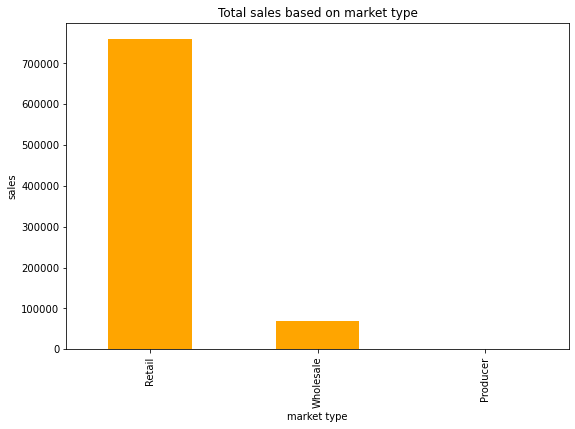

In [33]:
# plotting a bar chart to show the sales based on market type
mkt_type.plot(kind='bar', figsize=(9, 6), color='orange')
plt.title('Total sales based on market type')
plt.xlabel('market type')
plt.ylabel('sales')
plt.show()

## Most Food type purchased

In [34]:
# most popular food
type_count = data.commodity_purchased.value_counts()
type_count.head()

Millet - Retail             43916
Sorghum - Retail            43861
Maize - Retail              42480
Rice (imported) - Retail    42124
Rice (local) - Retail       29524
Name: commodity_purchased, dtype: int64

This results tells that Millet is the most purchased food over the years

In [35]:
data

,country_id,country,state_id,state,town_id,town,commodity_purchased_id,commodity_purchased,currency_id,currency,market_type_id,market_type,measurement_id,quantity,month_recorded,year_recorded,price_paid
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000


## Total Number of sales based on state and town

In [36]:
# Top 10 food with most purchased based on state and town
top_10_based_on_st = data.sort_values(['measurement_id', 'price_paid'], ascending= False)[['commodity_purchased','state','town', 'price_paid']].head(10)
top_10_based_on_st

,commodity_purchased,state,town,price_paid
107192,Maize (yellow) - Retail,Centre,Yaoundé-Marché 8e,5015.0
105310,Maize (yellow) - Retail,Centre,Yaoundé-Mfoundi,4975.0
106415,Maize (yellow) - Retail,Centre,Yaoundé-Mokolo,4935.0
107111,Maize (white) - Retail,Centre,Yaoundé-Marché 8e,4927.5
104743,Maize (white) - Retail,Centre,Yaoundé-Mfoundi,4905.0
106334,Maize (white) - Retail,Centre,Yaoundé-Mokolo,4860.0
117684,Maize (yellow) - Retail,Littoral,Douala-Sandaga,4775.0
116125,Maize (yellow) - Retail,Littoral,Douala-Bonaberi,4725.0
116902,Maize (yellow) - Retail,Littoral,Douala-Marché Central,4665.0
107191,Maize (yellow) - Retail,Centre,Yaoundé-Marché 8e,4615.0


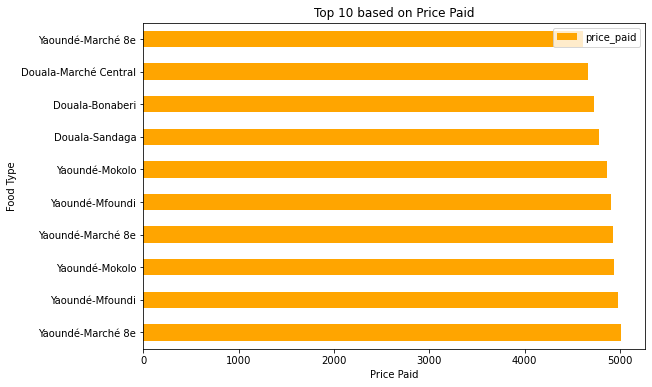

In [37]:
top_10_based_on_st.plot(kind='barh', x = 'town', y = 'price_paid', figsize=(9, 6), color = 'orange')
plt.title('Top 10 based on Price Paid')
plt.xlabel('Price Paid')
plt.ylabel('Food Type')
plt.show()

From the graph, 'Centre	Yaoundé-Marché 8e' has the highest sales followed by 'Centre Yaoundé-Mfoundi'.

In [38]:
data.head(3)

,country_id,country,state_id,state,town_id,town,commodity_purchased_id,commodity_purchased,currency_id,currency,market_type_id,market_type,measurement_id,quantity,month_recorded,year_recorded,price_paid
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0


## Higest Number of sales based on currency

In [39]:
top_10_curr = data.sort_values(['price_paid'], ascending = False)[['country', 'currency', 'quantity',"price_paid"]].head(10)
top_10_curr

,country,currency,quantity,price_paid
852171,Somalia,SOS,Unit,17250000.0
852179,Somalia,SOS,Unit,17200000.0
852175,Somalia,SOS,Unit,17000000.0
852178,Somalia,SOS,Unit,17000000.0
852172,Somalia,SOS,Unit,17000000.0
852173,Somalia,SOS,Unit,17000000.0
852174,Somalia,SOS,Unit,17000000.0
852177,Somalia,SOS,Unit,17000000.0
852176,Somalia,SOS,Unit,17000000.0
852180,Somalia,SOS,Unit,17000000.0


## CONCLUSION
 
From the analysis of the african food dataset, I can conclusively state that 'Rwanda' had the highest sales of food(137,746). Also, there was a huge decline in sales since 2020 till date. The highly food type was the Millet. The most sales of food based on state and year is Centre and 2020 respectively.

The limitation I encountered in the process of analysis was having to deal with null values in some columns. Columns that were non-essential to this analysis and columns that had high null values were removed. Also, records with null values were expunged because the total number of records with null values was insignificant(<10%).